In [74]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,f1_score,recall_score,accuracy_score
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [2]:
trained_data = pd.read_csv("new_train_sample.csv")

In [5]:
list(trained_data.columns)

['Unnamed: 0',
 'Id',
 'OrgId',
 'IncidentId',
 'AlertId',
 'Timestamp',
 'DetectorId',
 'AlertTitle',
 'Category',
 'MitreTechniques',
 'IncidentGrade',
 'ActionGrouped',
 'ActionGranular',
 'EntityType',
 'EvidenceRole',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'EmailClusterId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'ThreatFamily',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'ResourceType',
 'Roles',
 'OSFamily',
 'OSVersion',
 'AntispamDirection',
 'SuspicionLevel',
 'LastVerdict',
 'CountryCode',
 'State',
 'City']

In [8]:
pd.set_option('display.max_columns', None)
trained_data.head()

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,BenignPositive,NaN,NaN,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,Casdet,4132,4227,3586,NaN,NaN,5,66,NaN,Suspicious,Malicious,242,1445,10630
1,8470561,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,NaN,BenignPositive,NaN,NaN,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,3142,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,5897583,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...,BenignPositive,NaN,NaN,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,4181,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,Destination,5,66,NaN,NaN,NaN,242,1445,10630
3,3288552,1434519079555,204,108287,28575,2024-06-08T16:54:57.000Z,44,1233,SuspiciousActivity,NaN,TruePositive,NaN,NaN,File,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,97007,9177,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,4060961,1005022347708,54,528202,1458226,2024-06-09T02:48:01.000Z,102,58829,Exfiltration,NaN,BenignPositive,NaN,NaN,File,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,39978,114449,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


DATACLEANING AND PREPROCESSING

In [9]:
trained_data.shape

(4758418, 46)

In [10]:
trained_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   Id                  int64  
 2   OrgId               int64  
 3   IncidentId          int64  
 4   AlertId             int64  
 5   Timestamp           object 
 6   DetectorId          int64  
 7   AlertTitle          int64  
 8   Category            object 
 9   MitreTechniques     object 
 10  IncidentGrade       object 
 11  ActionGrouped       object 
 12  ActionGranular      object 
 13  EntityType          object 
 14  EvidenceRole        object 
 15  DeviceId            int64  
 16  Sha256              int64  
 17  IpAddress           int64  
 18  Url                 int64  
 19  AccountSid          int64  
 20  AccountUpn          int64  
 21  AccountObjectId     int64  
 22  AccountName         int64  
 23  DeviceName          int64  
 24  NetworkMessageId    int6

In [11]:
trained_data.isnull().sum()

Unnamed: 0                  0
Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2733136
IncidentGrade           25775
ActionGrouped         4730205
ActionGranular        4730205
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4710241
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4721038
FileName  

In [12]:
threshold= len(trained_data)* 0.5   
trained_data=trained_data.dropna(thresh=threshold,axis=1)

In [13]:
trained_data.shape

(4758418, 36)

In [14]:
trained_data.duplicated().sum()

np.int64(0)

In [15]:
trained_data.isnull().sum()

Unnamed: 0                0
Id                        0
OrgId                     0
IncidentId                0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
IncidentGrade         25775
EntityType                0
EvidenceRole              0
DeviceId                  0
Sha256                    0
IpAddress                 0
Url                       0
AccountSid                0
AccountUpn                0
AccountObjectId           0
AccountName               0
DeviceName                0
NetworkMessageId          0
RegistryKey               0
RegistryValueName         0
RegistryValueData         0
ApplicationId             0
ApplicationName           0
OAuthApplicationId        0
FileName                  0
FolderPath                0
ResourceIdName            0
OSFamily                  0
OSVersion                 0
CountryCode               0
State                     0
City                

In [16]:
trained_data["IncidentGrade"].fillna(trained_data["IncidentGrade"].mode()[0], inplace= True)

In [17]:
trained_data.isnull().sum()

Unnamed: 0            0
Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
dtype: int64

In [18]:
trained_data.IncidentGrade.unique()

array(['BenignPositive', 'TruePositive', 'FalsePositive'], dtype=object)

In [19]:
trained_data['Timestamp']=pd.to_datetime(trained_data['Timestamp'])

In [20]:
trained_data['Timestamp'].head()

0   2024-06-06 05:56:47+00:00
1   2024-06-03 10:45:09+00:00
2   2024-06-13 03:36:40+00:00
3   2024-06-08 16:54:57+00:00
4   2024-06-09 02:48:01+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

In [21]:
trained_data['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    2080549
TruePositive      1662087
FalsePositive     1015782
Name: count, dtype: int64

In [23]:
trained_data.describe()

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
count,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06,4.758418e+06
mean,4.757914e+06,8.425237e+11,1.815396e+02,7.066577e+04,4.062607e+05,1.105717e+02,2.945133e+03,9.566974e+04,1.287152e+05,2.857508e+05,1.503435e+05,3.523730e+05,4.642965e+05,3.408950e+05,3.569025e+05,1.432333e+05,4.801006e+05,1.628162e+03,6.347324e+02,8.595493e+02,2.200969e+03,3.342850e+03,8.807987e+02,2.622379e+05,1.076177e+05,3.583441e+03,4.898634e+00,6.465691e+01,2.236922e+02,1.351550e+03,9.936695e+03
std,2.747579e+06,4.962194e+11,3.868571e+02,1.208436e+05,4.590474e+05,4.345897e+02,1.145625e+04,1.633971e+04,3.399745e+04,1.412268e+05,3.748440e+04,1.665718e+05,2.902921e+05,1.600062e+05,1.745127e+05,3.606424e+04,1.416764e+05,6.684237e+01,1.262370e+01,1.912946e+01,3.313749e+02,5.101700e+02,1.282564e+01,8.155180e+04,3.220588e+04,9.093033e+01,7.031900e-01,9.310489e+00,6.276881e+01,3.508813e+02,2.605943e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.378584e+06,4.123169e+11,1.000000e+01,5.030000e+02,2.323700e+04,2.000000e+00,2.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,9.237300e+04,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
50%,4.757002e+06,8.418136e+11,4.500000e+01,1.032300e+04,2.165090e+05,9.000000e+00,1.100000e+01,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,6.739340e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
75%,7.137112e+06,1.271310e+12,1.710000e+02,8.436900e+04,6.709575e+05,4.500000e+01,1.800000e+02,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,6.739340e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
max,9.516834e+06,1.709397e+12,6.147000e+03,5.997030e+05,1.721456e+06,9.522000e+03,1.131730e+05,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,6.739340e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04


EXPLORATORY DATA ANALYSIS

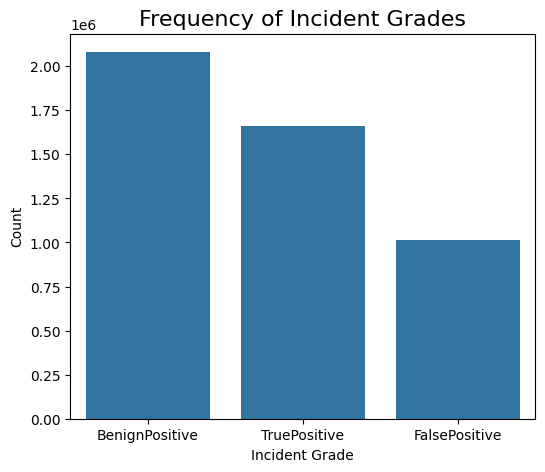

In [24]:
plt.figure(figsize=(6, 5))
sns.countplot(
    x="IncidentGrade",  
    data=trained_data,  
)
plt.title("Frequency of Incident Grades", fontsize=16)
plt.xlabel("Incident Grade", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.show()

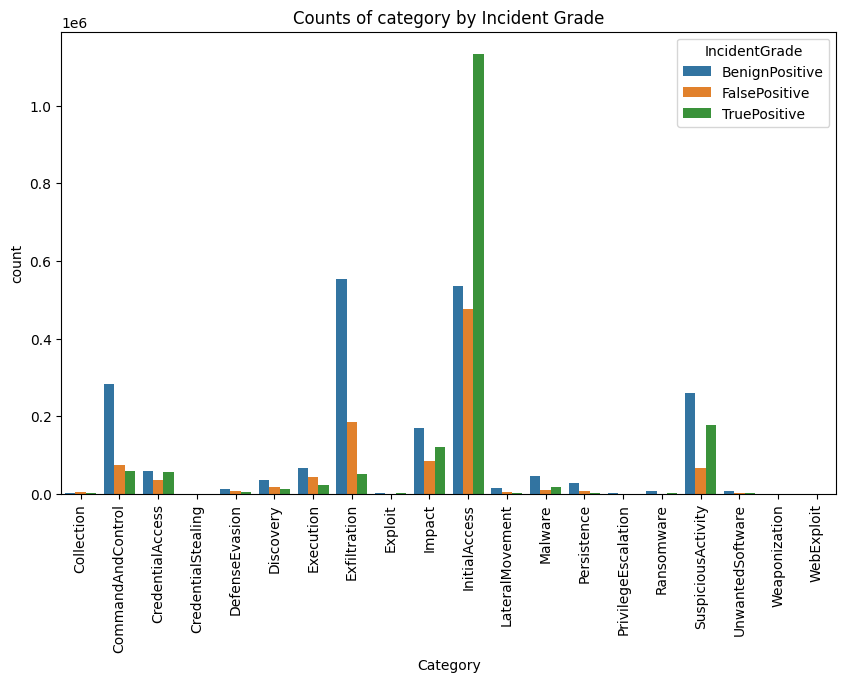

In [26]:
grouped_data=trained_data.groupby(["Category","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(10,6))
sns.barplot(data=grouped_data,x="Category", y="count", hue = "IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of category by Incident Grade")
plt.show() 

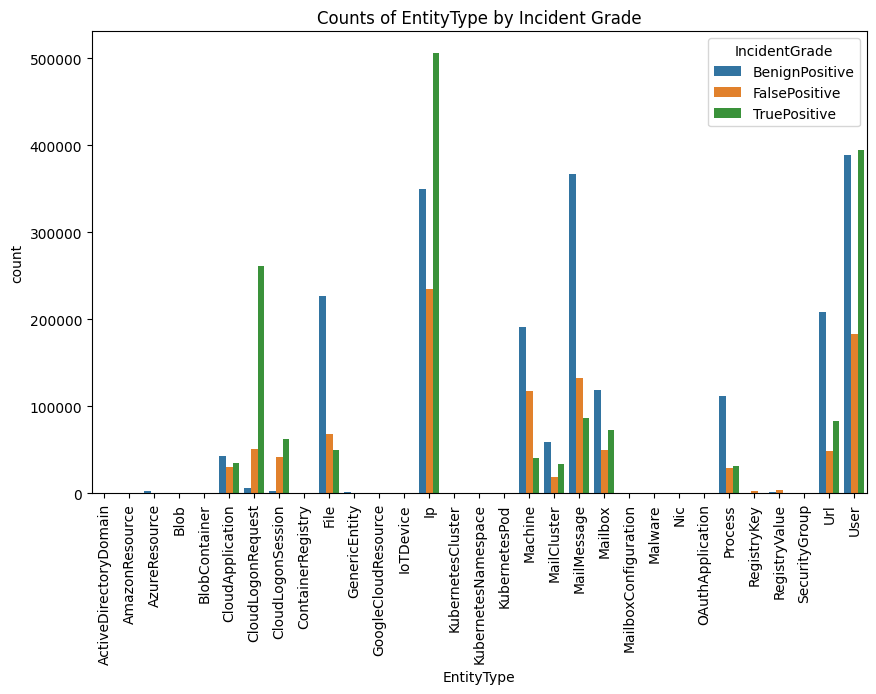

In [27]:
grouped_data=trained_data.groupby(["EntityType","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(10,6))
sns.barplot(data=grouped_data,x="EntityType", y="count", hue = "IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of EntityType by Incident Grade")
plt.show()


In [28]:
trained_data.head()

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06 05:56:47+00:00,31,813,Malware,BenignPositive,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,4132,4227,3586,5,66,242,1445,10630
1,8470561,927712939180,33,5065,3990,2024-06-03 10:45:09+00:00,38,25,Impact,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,3142,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
2,5897583,1090921697002,201,150787,807590,2024-06-13 03:36:40+00:00,419,444,Execution,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,4181,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
3,3288552,1434519079555,204,108287,28575,2024-06-08 16:54:57+00:00,44,1233,SuspiciousActivity,TruePositive,File,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,97007,9177,3586,5,66,242,1445,10630
4,4060961,1005022347708,54,528202,1458226,2024-06-09 02:48:01+00:00,102,58829,Exfiltration,BenignPositive,File,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,39978,114449,3586,5,66,242,1445,10630


In [29]:
trained_data.drop(["DeviceName","DeviceId","ResourceIdName","OAuthApplicationId","NetworkMessageId","Unnamed: 0"], axis =1 , inplace = True)

In [30]:
trained_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 30 columns):
 #   Column             Dtype              
---  ------             -----              
 0   Id                 int64              
 1   OrgId              int64              
 2   IncidentId         int64              
 3   AlertId            int64              
 4   Timestamp          datetime64[ns, UTC]
 5   DetectorId         int64              
 6   AlertTitle         int64              
 7   Category           object             
 8   IncidentGrade      object             
 9   EntityType         object             
 10  EvidenceRole       object             
 11  Sha256             int64              
 12  IpAddress          int64              
 13  Url                int64              
 14  AccountSid         int64              
 15  AccountUpn         int64              
 16  AccountObjectId    int64              
 17  AccountName        int64              
 18  Re

FEATURE SELECTION AND CORRELATION

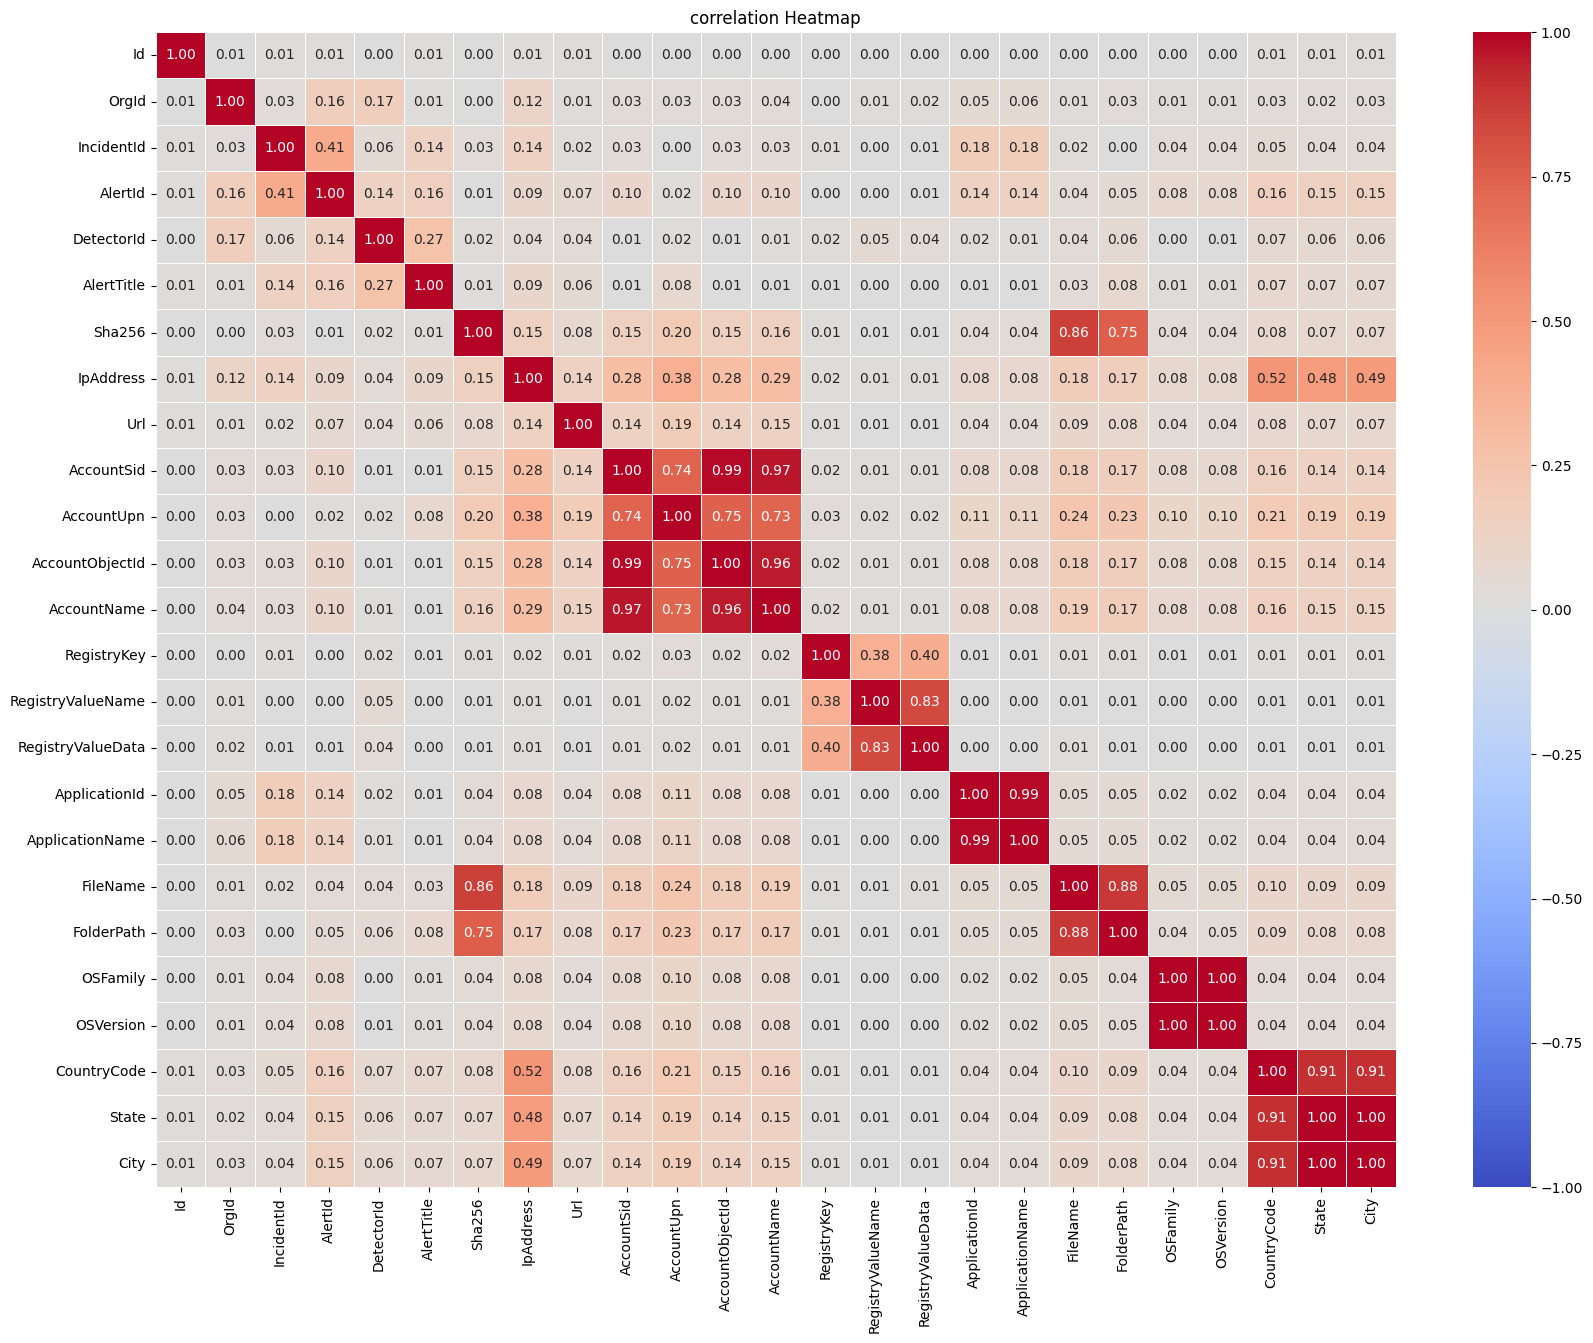

In [31]:
numeric_df=trained_data.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [32]:
trained_data.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid","AccountObjectId","FolderPath","AccountUpn"], axis =1 , inplace = True)

In [33]:
trained_data.drop(["RegistryKey","RegistryValueData","DetectorId","Id","OrgId","IncidentId", "AlertId", "Timestamp",], axis =1 , inplace = True)

In [34]:
trained_data.drop(["OSFamily","OSVersion",'State','FileName','AccountName','IpAddress','Url','ApplicationId' ], axis =1 , inplace = True)

In [35]:
trained_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   AlertTitle     int64 
 1   Category       object
 2   IncidentGrade  object
 3   EntityType     object
 4   EvidenceRole   object
 5   City           int64 
dtypes: int64(2), object(4)
memory usage: 217.8+ MB


ENCODING TECHNIQUE

In [36]:
trained_data.select_dtypes(include=["object"]).columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole'], dtype='object')

In [38]:
Categorical_train=['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']

In [39]:
label_encoders = {}

for column in Categorical_train:
    le = LabelEncoder()
    trained_data[column] = le.fit_transform(trained_data[column])
    label_encoders[column] = le

In [41]:
trained_data.head()

,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,City
0,813,12,0,9,1,10630
1,25,9,0,17,0,10630
2,444,6,0,17,0,10630
3,1233,16,2,9,1,10630
4,58829,7,0,9,0,10630


In [42]:
trained_data.select_dtypes(include=["int32","int64"]).columns

Index(['AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'City'],
      dtype='object')

In [43]:
trained_data.to_csv('datatrained.csv',index= False)

CHECKING IMBALANCED DATASET

In [52]:
trained_data.head()

,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,City
0,813,12,0,9,1,10630
1,25,9,0,17,0,10630
2,444,6,0,17,0,10630
3,1233,16,2,9,1,10630
4,58829,7,0,9,0,10630


In [53]:
X = trained_data.drop('IncidentGrade', axis=1)
y = trained_data['IncidentGrade']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [55]:
print("Class distribution before resampling:")
print(y_train.value_counts())

Class distribution before resampling:
IncidentGrade
0    1664439
2    1329669
1     812626
Name: count, dtype: int64


In [60]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Class distribution after SMOTE:
IncidentGrade
2    1664439
0    1664439
1    1664439
Name: count, dtype: int64


EVALUATE MODELS ON RESAMPLED DATA

Logistic Regression

In [61]:
model_lr = LogisticRegression(max_iter=100, multi_class='auto', verbose=0, solver='saga')
model_lr.fit(X_train_smote, y_train_smote)

LogisticRegression(multi_class='auto', solver='saga')

In [62]:
y_train_pred_lr = model_lr.predict(X_train_smote)

y_test_pred_lr = model_lr.predict(X_test)

train_accuracy = accuracy_score(y_train_smote, y_train_pred_lr)
train_precision = precision_score(y_train_smote, y_train_pred_lr, average='macro')
train_recall = recall_score(y_train_smote, y_train_pred_lr, average='macro')
train_f1_macro = f1_score(y_train_smote, y_train_pred_lr, average='macro')

test_accuracy = accuracy_score(y_test, y_test_pred_lr)
test_precision = precision_score(y_test, y_test_pred_lr, average='macro')
test_recall = recall_score(y_test, y_test_pred_lr, average='macro')
test_f1_macro = f1_score(y_test, y_test_pred_lr, average='macro')

metrics_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1 Score (Macro)'],
    'Training Score': [train_accuracy, train_precision, train_recall, train_f1_macro],
    'Testing Score': [test_accuracy, test_precision, test_recall, test_f1_macro]
})

print("\nLogistic Regression - Training and Testing Metrics:")
print(metrics_summary)


Logistic Regression - Training and Testing Metrics:
              Metric  Training Score  Testing Score
0           Accuracy        0.459021       0.471699
1  Precision (Macro)        0.458280       0.465280
2     Recall (Macro)        0.459021       0.458079
3   F1 Score (Macro)        0.458594       0.455125


Random Forest Classification

In [63]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=10, min_samples_leaf=5)
model_rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [64]:
y_train_pred_rf = model_rf.predict(X_train_smote)
y_test_pred_rf = model_rf.predict(X_test)

train_accuracy_rf = accuracy_score(y_train_smote, y_train_pred_rf)
train_precision_rf = precision_score(y_train_smote, y_train_pred_rf, average='macro')
train_recall_rf = recall_score(y_train_smote, y_train_pred_rf, average='macro')
train_f1_macro_rf = f1_score(y_train_smote, y_train_pred_rf, average='macro')

test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf, average='macro')
test_recall_rf = recall_score(y_test, y_test_pred_rf, average='macro')
test_f1_macro_rf = f1_score(y_test, y_test_pred_rf, average='macro')

metrics_summary_rf = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1 Score (Macro)'],
    'Training Score': [train_accuracy_rf, train_precision_rf, train_recall_rf, train_f1_macro_rf],
    'Testing Score': [test_accuracy_rf, test_precision_rf, test_recall_rf, test_f1_macro_rf]
})

print("\nRandom Forest - Training and Testing Metrics:")
print(metrics_summary_rf)


Random Forest - Training and Testing Metrics:
              Metric  Training Score  Testing Score
0           Accuracy        0.635644       0.666451
1  Precision (Macro)        0.647889       0.647420
2     Recall (Macro)        0.635644       0.633010
3   F1 Score (Macro)        0.631792       0.637070


Decision Tree Classification

In [65]:
model_dt = DecisionTreeClassifier(random_state=42,min_samples_split=10, min_samples_leaf=5, max_features= 'sqrt') 
model_dt.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [66]:
y_train_pred_dt = model_dt.predict(X_train_smote)
y_test_pred_dt = model_dt.predict(X_test)

train_accuracy_dt = accuracy_score(y_train_smote, y_train_pred_dt)
train_precision_dt = precision_score(y_train_smote, y_train_pred_dt, average='macro')
train_recall_dt = recall_score(y_train_smote, y_train_pred_dt, average='macro')
train_f1_macro_dt = f1_score(y_train_smote, y_train_pred_dt, average='macro')

test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
test_precision_dt = precision_score(y_test, y_test_pred_dt, average='macro')
test_recall_dt = recall_score(y_test, y_test_pred_dt, average='macro')
test_f1_macro_dt = f1_score(y_test, y_test_pred_dt, average='macro')

metrics_summary_dt = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1 Score (Macro)'],
    'Training Score': [train_accuracy_dt, train_precision_dt, train_recall_dt, train_f1_macro_dt],
    'Testing Score': [test_accuracy_dt, test_precision_dt, test_recall_dt, test_f1_macro_dt]
})

print("\nDecision Tree - Training and Testing Metrics:")
print(metrics_summary_dt)


Decision Tree - Training and Testing Metrics:
              Metric  Training Score  Testing Score
0           Accuracy        0.702512       0.711661
1  Precision (Macro)        0.705664       0.693243
2     Recall (Macro)        0.702512       0.693135
3   F1 Score (Macro)        0.701440       0.692546


The Decision tree model performed the best overall, as it balanced training and testing performance effectively without significant overfitting.

In [68]:
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(model_rf, file)
print("Model saved successfully")

Model saved successfully


In [69]:
with open('decision_tree_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
print("Model loaded successfully")

Model loaded successfully


In [70]:
y_test_prob_rf = model_rf.predict_proba(X_test)   #Gives probability of target classification
print(y_test_prob_rf)

[[0.01949832 0.38656209 0.59393959]
 [0.50820667 0.07566576 0.41612757]
 [0.32749082 0.31773722 0.35477196]
 ...
 [0.55286594 0.33878693 0.10834713]
 [0.27700094 0.18003139 0.54296766]
 [0.28185758 0.31642066 0.40172176]]


In [73]:
X_test = pd.DataFrame([[813, 12, 9, 1, 10630]],
        columns=["AlertTitle","Category","EntityType","EvidenceRole","City"])

y_test_pred_rf = model_rf.predict(X_test) 
y_test_pred_rf

array([0])